# 导入工具包

In [1]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入手部关键点检测模型

In [3]:
# 导入solution
mp_hands = mp.solutions.hands

# 导入模型
hands = mp_hands.Hands(static_image_mode=False,        # 是静态图片还是连续视频帧
                       max_num_hands=4,                # 最多检测几只手
                       min_detection_confidence=0.5,   # 置信度阈值，过滤低于该阈值的预测结果
                       min_tracking_confidence=0.5)    # 追踪阈值

# 导入绘图函数
mpDraw = mp.solutions.drawing_utils 

# 读入图像，输入模型，获取预测结果

In [4]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('./images/camera1.jpg')

# 获取图像宽高
h, w = img.shape[0], img.shape[1]

# 水平镜像翻转图像，使图中左右手与真实左右手对应
# 参数 1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img, 1)

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = hands.process(img_RGB)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


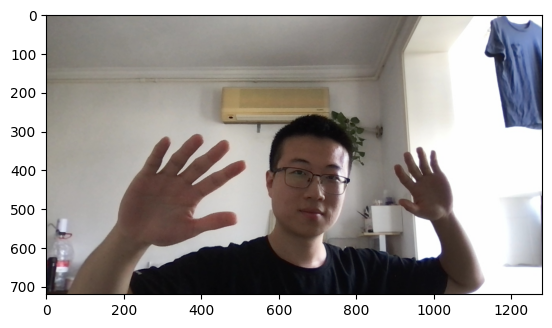

In [5]:
look_img(img)

# 索引为0的手

In [6]:
hand_21 = results.multi_hand_landmarks[0]

# 索引为0的手的手腕根部（0号关键点）

In [7]:
cx = int(hand_21.landmark[0].x * w)
cy = int(hand_21.landmark[0].y * h)
cz = hand_21.landmark[0].z

In [8]:
print(cx, cy, cz)

1027 507 1.1171322000791406e-07


# 索引为0的手的食指指尖（8号关键点）

In [9]:
cx = int(hand_21.landmark[8].x * w)
cy = int(hand_21.landmark[8].y * h)
cz = hand_21.landmark[8].z

In [10]:
print(cx, cy, cz)

906 394 -0.03489527106285095


In [11]:
# 绘制圆：图像，圆心坐标，半径，BGR颜色，最后一个参数为线宽，-1表示填充
img = cv2.circle(img,(cx,cy), 5, (0,0,255), -1)

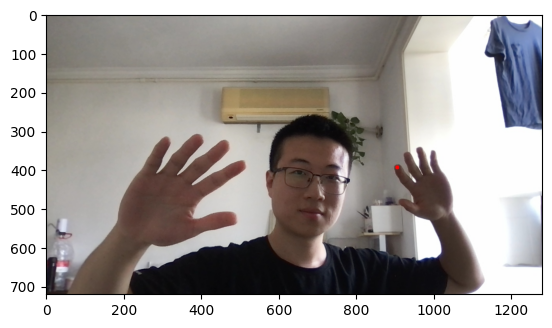

In [12]:
look_img(img)

# 左右手信息

In [13]:
handness_str = ''
if results.multi_hand_landmarks: # 如果有检测到手
    # 遍历每一只检测出的手
    for hand_idx in range(len(results.multi_hand_landmarks)):
        hand_21 = results.multi_hand_landmarks[hand_idx]
        temp_handness = results.multi_handedness[hand_idx].classification[0].label
        handness_str += str(hand_idx) + ':' + temp_handness + ' '

In [14]:
handness_str

'0:Right 1:Left '

# 可视化不同种类关键点及深度

In [15]:
if results.multi_hand_landmarks: # 如果有检测到手

    handness_str = ''
    index_finger_tip_str = ''
    for hand_idx in range(len(results.multi_hand_landmarks)):
        
        # 获取该手的21个关键点坐标
        hand_21 = results.multi_hand_landmarks[hand_idx]
        
        # 可视化关键点及骨架连线
        mpDraw.draw_landmarks(img, hand_21, mp_hands.HAND_CONNECTIONS)
        
        # 记录左右手信息
        temp_handness = results.multi_handedness[hand_idx].classification[0].label
        handness_str += '{}:{} '.format(hand_idx, temp_handness)
        
        # 获取手腕根部深度坐标
        cz0 = hand_21.landmark[0].z
        
        for i in range(21): # 遍历该手的21个关键点
            
            # 获取3D坐标
            cx = int(hand_21.landmark[i].x * w)
            cy = int(hand_21.landmark[i].y * h)
            cz = hand_21.landmark[i].z
            depth_z = cz0 - cz
            
            # 用圆的半径反映深度大小
            radius = int(6 * (1 + depth_z))

            if i == 0: # 手腕
                img = cv2.circle(img,(cx,cy), radius*2, (0,0,255), -1)
            if i == 8: # 食指指尖
                img = cv2.circle(img,(cx,cy), radius*2, (193,182,255), -1)
                index_finger_tip_str += '{}:{:.2f} '.format(hand_idx, depth_z)
            if i in [1,5,9,13,17]: # 指根
                img = cv2.circle(img,(cx,cy), radius, (16,144,247), -1)
            if i in [2,6,10,14,18]: # 第一指节
                img = cv2.circle(img,(cx,cy), radius, (1,240,255), -1)
            if i in [3,7,11,15,19]: # 第二指节
                img = cv2.circle(img,(cx,cy), radius, (140,47,240), -1)
            if i in [4,12,16,20]: # 指尖（除食指指尖）
                img = cv2.circle(img,(cx,cy), radius, (223,155,60), -1)

    scaler = 1
    img = cv2.putText(img, handness_str, (25 * scaler, 100 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
    img = cv2.putText(img, index_finger_tip_str, (25 * scaler, 150 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

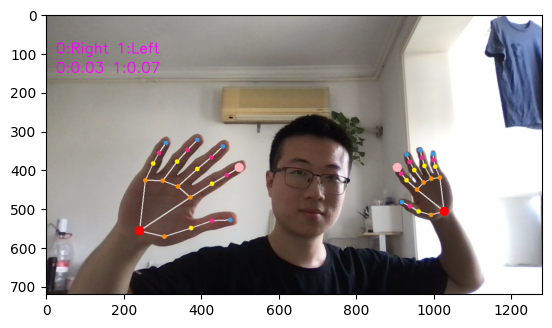

In [16]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

# 整理代码

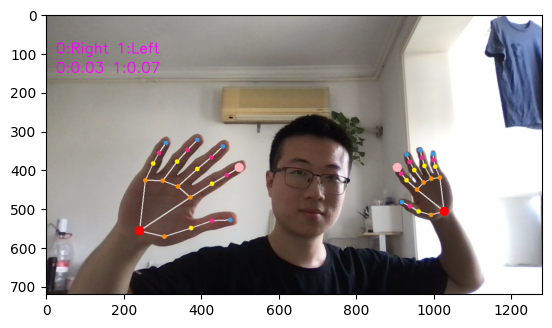

True

In [17]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
# 进度条库
from tqdm import tqdm
# 时间库
import time
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()


# 导入solution
mp_hands = mp.solutions.hands
# 导入模型
hands = mp_hands.Hands(static_image_mode=False,        # 是静态图片还是连续视频帧
                       max_num_hands=4,                # 最多检测几只手
                       min_detection_confidence=0.5,   # 置信度阈值
                       min_tracking_confidence=0.5)    # 追踪阈值
# 导入绘图函数
mpDraw = mp.solutions.drawing_utils 

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('./images/camera1.jpg')

# 获取图像宽高
h, w = img.shape[0], img.shape[1]

# 水平镜像翻转图像，使图中左右手与真实左右手对应
# 参数 1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img, 1)
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = hands.process(img_RGB)

if results.multi_hand_landmarks: # 如果有检测到手

    handness_str = ''
    index_finger_tip_str = ''
    for hand_idx in range(len(results.multi_hand_landmarks)):
        
        # 获取该手的21个关键点坐标
        hand_21 = results.multi_hand_landmarks[hand_idx]
        
        # 可视化关键点及骨架连线
        mpDraw.draw_landmarks(img, hand_21, mp_hands.HAND_CONNECTIONS)
        
        # 记录左右手信息
        temp_handness = results.multi_handedness[hand_idx].classification[0].label
        handness_str += '{}:{} '.format(hand_idx, temp_handness)
        
        # 获取手腕根部深度坐标
        cz0 = hand_21.landmark[0].z
        
        for i in range(21): # 遍历该手的21个关键点
            
            # 获取3D坐标
            cx = int(hand_21.landmark[i].x * w)
            cy = int(hand_21.landmark[i].y * h)
            cz = hand_21.landmark[i].z
            depth_z = cz0 - cz
            
            # 用圆的半径反映深度大小
            radius = int(6 * (1 + depth_z))

            if i == 0: # 手腕
                img = cv2.circle(img,(cx,cy), radius*2, (0,0,255), -1)
            if i == 8: # 食指指尖
                img = cv2.circle(img,(cx,cy), radius*2, (193,182,255), -1)
                index_finger_tip_str += '{}:{:.2f} '.format(hand_idx, depth_z)
            if i in [1,5,9,13,17]: # 指根
                img = cv2.circle(img,(cx,cy), radius, (16,144,247), -1)
            if i in [2,6,10,14,18]: # 第一指节
                img = cv2.circle(img,(cx,cy), radius, (1,240,255), -1)
            if i in [3,7,11,15,19]: # 第二指节
                img = cv2.circle(img,(cx,cy), radius, (140,47,240), -1)
            if i in [4,12,16,20]: # 指尖（除食指指尖）
                img = cv2.circle(img,(cx,cy), radius, (223,155,60), -1)

    scaler = 1
    img = cv2.putText(img, handness_str, (25 * scaler, 100 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
    img = cv2.putText(img, index_finger_tip_str, (25 * scaler, 150 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

look_img(img)

cv2.imwrite('D.jpg',img)